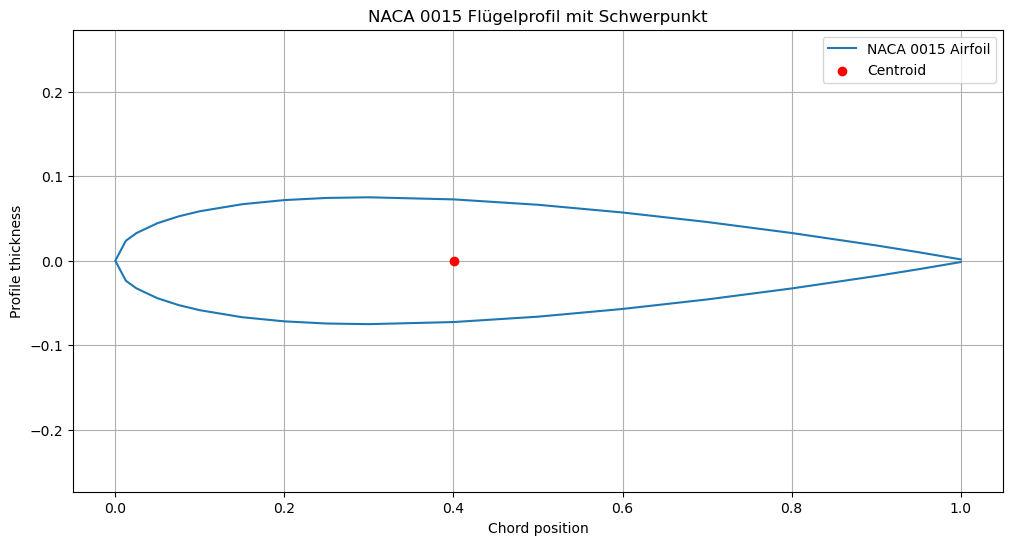

(0.40071428571428575, 3.903127820947816e-19)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# NACA 0015 airfoil coordinates
naca_0015 = np.array([
    [1.0000, 0.00158],
    [0.9500, 0.01008],
    [0.9000, 0.01810],
    [0.8000, 0.03279],
    [0.7000, 0.04580],
    [0.6000, 0.05704],
    [0.5000, 0.06617],
    [0.4000, 0.07254],
    [0.3000, 0.07502],
    [0.2500, 0.07427],
    [0.2000, 0.07172],
    [0.1500, 0.06682],
    [0.1000, 0.05853],
    [0.0750, 0.05250],
    [0.0500, 0.04443],
    [0.0250, 0.03268],
    [0.0125, 0.02367],
    [0.0000, 0.00000],
    [0.0125, -0.02367],
    [0.0250, -0.03268],
    [0.0500, -0.04443],
    [0.0750, -0.05250],
    [0.1000, -0.05853],
    [0.1500, -0.06682],
    [0.2000, -0.07172],
    [0.2500, -0.07427],
    [0.3000, -0.07502],
    [0.4000, -0.07254],
    [0.5000, -0.06617],
    [0.6000, -0.05704],
    [0.7000, -0.04580],
    [0.8000, -0.03279],
    [0.9000, -0.01810],
    [0.9500, -0.01008],
    [1.0000, -0.00158]
])

# Calculate the centroid of the airfoil
centroid_x = np.mean(naca_0015[:, 0])
centroid_y = np.mean(naca_0015[:, 1])

# Plot the airfoil
plt.figure(figsize=(12, 6))
plt.plot(naca_0015[:, 0], naca_0015[:, 1], label='NACA 0015 Airfoil')
plt.scatter(centroid_x, centroid_y, color='red', zorder=5, label='Centroid')
plt.title('NACA 0015 Flügelprofil mit Schwerpunkt')
plt.xlabel('Chord position')
plt.ylabel('Profile thickness')
plt.legend()
plt.grid(True)
plt.axis('equal')  # This will make sure the aspect ratio is square
plt.show()

# Return the centroid coordinates
(centroid_x, centroid_y)


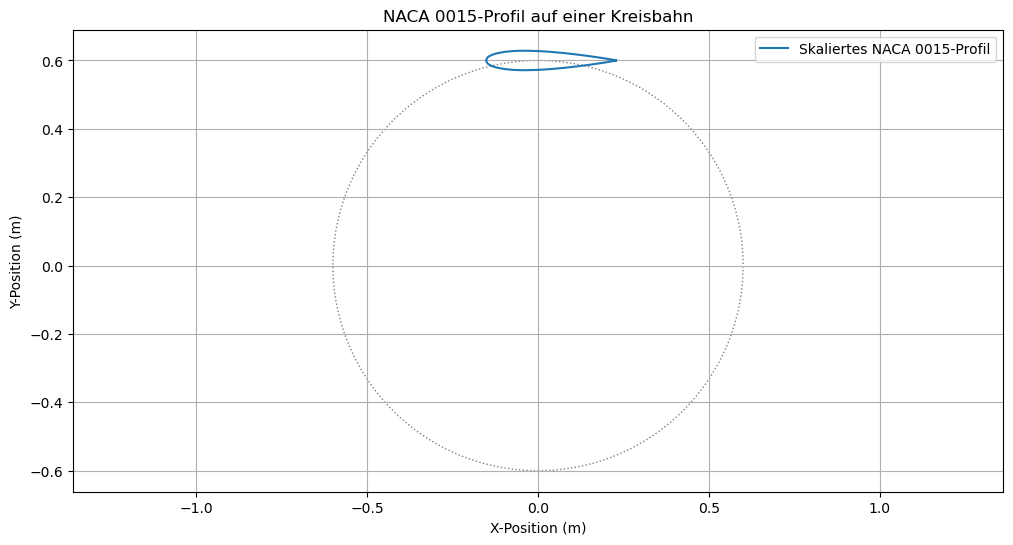

In [2]:
import matplotlib.patches as patches

# Kreisparameter
kreis_durchmesser = 1.20  # in Metern
kreis_radius = kreis_durchmesser / 2
kreis_mittelpunkt = (0, 0)

# Skalierung des NACA-Profils
sehnenlaenge = 0.38  # in Metern
skalierungsfaktor = sehnenlaenge / (naca_0015[:, 0].max() - naca_0015[:, 0].min())
skaliertes_naca = naca_0015 * skalierungsfaktor

# Positionierung des NACA-Profils auf der Kreisbahn
# Das Profil wird so verschoben, dass sein Zentroid bei (0, 0.60) liegt
verschiebung_x = -centroid_x * skalierungsfaktor
verschiebung_y = 0.60 - centroid_y * skalierungsfaktor
positioniertes_naca = skaliertes_naca + [verschiebung_x, verschiebung_y]

# Erstellung des Plots
plt.figure(figsize=(12, 6))
kreis = patches.Circle(kreis_mittelpunkt, kreis_radius, fill=False, color='gray', linestyle='dotted')
plt.gca().add_patch(kreis)
plt.plot(positioniertes_naca[:, 0], positioniertes_naca[:, 1], label='Skaliertes NACA 0015-Profil')
#plt.scatter(centroid_x + verschiebung_x, centroid_y + verschiebung_y, color='red', zorder=5, label='Verschobener Zentroid')
plt.title('NACA 0015-Profil auf einer Kreisbahn')
plt.xlabel('X-Position (m)')
plt.ylabel('Y-Position (m)')
plt.legend()
plt.grid(True)
plt.axis('equal')  # Quadratisches Seitenverhältnis beibehalten
plt.show()


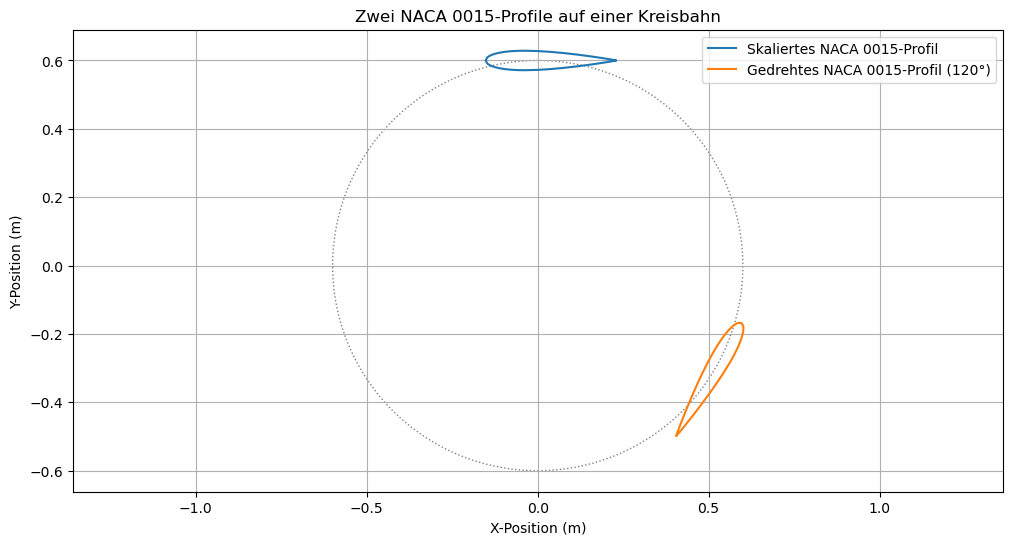

In [3]:
def rotate_coordinates(coords, angle_deg, origin=(0, 0)):
    """
    Rotiert Koordinaten um einen gegebenen Winkel (in Grad) um einen Ursprung.

    :param coords: Die Koordinaten, die gedreht werden sollen.
    :param angle_deg: Der Drehwinkel in Grad.
    :param origin: Der Ursprung der Drehung.
    :return: Die gedrehten Koordinaten.
    """
    angle_rad = np.radians(angle_deg)
    rotation_matrix = np.array([[np.cos(angle_rad), -np.sin(angle_rad)],
                                [np.sin(angle_rad), np.cos(angle_rad)]])
    
    rotated_coords = np.dot(coords - origin, rotation_matrix) + origin
    return rotated_coords

# Rotation des zweiten NACA-Profils um 120 Grad
rotationswinkel = 120
gedrehtes_naca = rotate_coordinates(positioniertes_naca, rotationswinkel, kreis_mittelpunkt)

# Erstellung des Plots mit beiden Profilen
plt.figure(figsize=(12, 6))
kreis = patches.Circle(kreis_mittelpunkt, kreis_radius, fill=False, color='gray', linestyle='dotted')
plt.gca().add_patch(kreis)
plt.plot(positioniertes_naca[:, 0], positioniertes_naca[:, 1], label='Skaliertes NACA 0015-Profil')
plt.plot(gedrehtes_naca[:, 0], gedrehtes_naca[:, 1], label='Gedrehtes NACA 0015-Profil (120°)')
#plt.scatter(centroid_x + verschiebung_x, centroid_y + verschiebung_y, color='red', zorder=5, label='Verschobener Zentroid')
plt.title('Zwei NACA 0015-Profile auf einer Kreisbahn')
plt.xlabel('X-Position (m)')
plt.ylabel('Y-Position (m)')
plt.legend()
plt.grid(True)
plt.axis('equal')  # Quadratisches Seitenverhältnis beibehalten
plt.show()


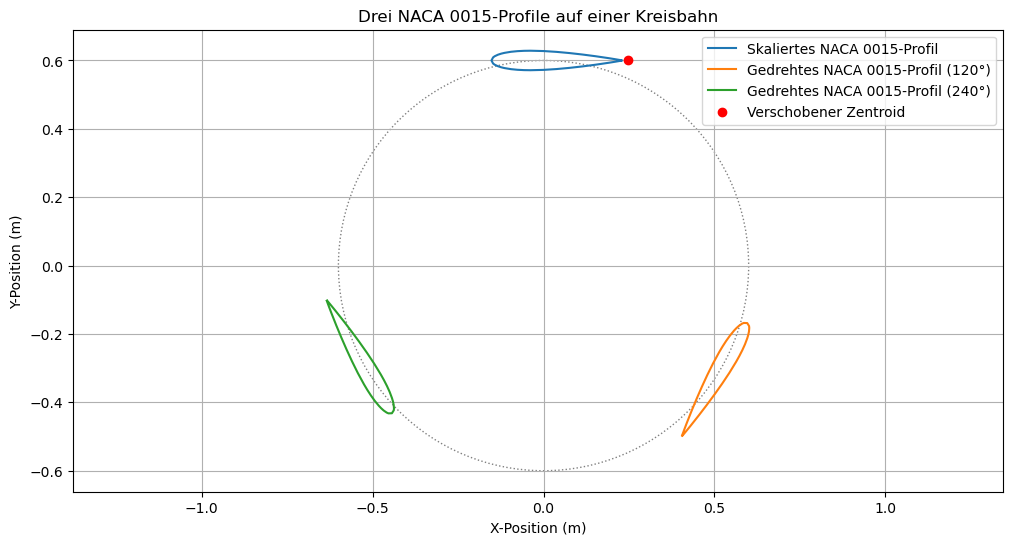

In [28]:
# Rotation des dritten NACA-Profils um 240 Grad
rotationswinkel_240 = 240
gedrehtes_naca_240 = rotate_coordinates(positioniertes_naca, rotationswinkel_240, kreis_mittelpunkt)

# Erstellung des Plots mit allen drei Profilen
plt.figure(figsize=(12, 6))
kreis = patches.Circle(kreis_mittelpunkt, kreis_radius, fill=False, color='gray', linestyle='dotted')
plt.gca().add_patch(kreis)
plt.plot(positioniertes_naca[:, 0], positioniertes_naca[:, 1], label='Skaliertes NACA 0015-Profil')
plt.plot(gedrehtes_naca[:, 0], gedrehtes_naca[:, 1], label='Gedrehtes NACA 0015-Profil (120°)')
plt.plot(gedrehtes_naca_240[:, 0], gedrehtes_naca_240[:, 1], label='Gedrehtes NACA 0015-Profil (240°)')
plt.scatter(centroid_x + verschiebung_x, centroid_y + verschiebung_y, color='red', zorder=5, label='Verschobener Zentroid')
plt.title('Drei NACA 0015-Profile auf einer Kreisbahn')
plt.xlabel('X-Position (m)')
plt.ylabel('Y-Position (m)')
plt.legend()
plt.grid(True)
plt.axis('equal')  # Quadratisches Seitenverhältnis beibehalten
plt.show()


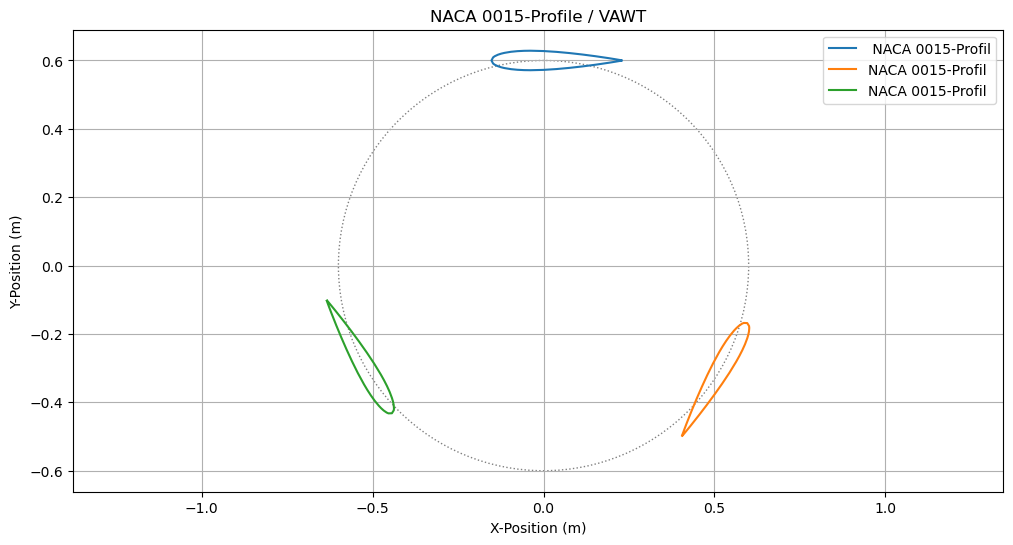

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

# NACA 0015 airfoil coordinates
naca_0015 = np.array([
    [1.0000, 0.00158],
    [0.9500, 0.01008],
    [0.9000, 0.01810],
    [0.8000, 0.03279],
    [0.7000, 0.04580],
    [0.6000, 0.05704],
    [0.5000, 0.06617],
    [0.4000, 0.07254],
    [0.3000, 0.07502],
    [0.2500, 0.07427],
    [0.2000, 0.07172],
    [0.1500, 0.06682],
    [0.1000, 0.05853],
    [0.0750, 0.05250],
    [0.0500, 0.04443],
    [0.0250, 0.03268],
    [0.0125, 0.02367],
    [0.0000, 0.00000],
    [0.0125, -0.02367],
    [0.0250, -0.03268],
    [0.0500, -0.04443],
    [0.0750, -0.05250],
    [0.1000, -0.05853],
    [0.1500, -0.06682],
    [0.2000, -0.07172],
    [0.2500, -0.07427],
    [0.3000, -0.07502],
    [0.4000, -0.07254],
    [0.5000, -0.06617],
    [0.6000, -0.05704],
    [0.7000, -0.04580],
    [0.8000, -0.03279],
    [0.9000, -0.01810],
    [0.9500, -0.01008],
    [1.0000, -0.00158]
])

# Berechnet den Schwerpunkt des Profils
centroid_x = np.mean(naca_0015[:, 0])
centroid_y = np.mean(naca_0015[:, 1])

# Kreisparameter
kreis_durchmesser = 1.20  # Durchmesser in Metern
kreis_radius = kreis_durchmesser / 2
kreis_mittelpunkt = (0, 0)

# Skalierung des NACA-Profils
sehnenlaenge = 0.38  # Sehnenlänge in Metern
skalierungsfaktor = sehnenlaenge / (naca_0015[:, 0].max() - naca_0015[:, 0].min())
skaliertes_naca = naca_0015 * skalierungsfaktor

# Positionierung des NACA-Profils auf der Kreisbahn
verschiebung_x = -centroid_x * skalierungsfaktor
verschiebung_y = 0.60 - centroid_y * skalierungsfaktor
positioniertes_naca = skaliertes_naca + [verschiebung_x, verschiebung_y]

# Funktion zur Rotation von Koordinaten
def rotate_coordinates(coords, angle_deg, origin=(0, 0)):
    angle_rad = np.radians(angle_deg)
    rotation_matrix = np.array([[np.cos(angle_rad), -np.sin(angle_rad)],
                                [np.sin(angle_rad), np.cos(angle_rad)]])
    rotated_coords = np.dot(coords - origin, rotation_matrix) + origin
    return rotated_coords

# Rotation der NACA-Profile
rotationswinkel_120 = 120
rotationswinkel_240 = 240
gedrehtes_naca_120 = rotate_coordinates(positioniertes_naca, rotationswinkel_120, kreis_mittelpunkt)
gedrehtes_naca_240 = rotate_coordinates(positioniertes_naca, rotationswinkel_240, kreis_mittelpunkt)

# Erstellung des Plots mit allen drei Profilen
plt.figure(figsize=(12, 6))
kreis = patches.Circle(kreis_mittelpunkt, kreis_radius, fill=False, color='gray', linestyle='dotted')
plt.gca().add_patch(kreis)
plt.plot(positioniertes_naca[:, 0], positioniertes_naca[:, 1], label=' NACA 0015-Profil')
plt.plot(gedrehtes_naca_120[:, 0], gedrehtes_naca_120[:, 1], label='NACA 0015-Profil ')
plt.plot(gedrehtes_naca_240[:, 0], gedrehtes_naca_240[:, 1], label='NACA 0015-Profil ')
plt.title('NACA 0015-Profile / VAWT')
plt.xlabel('X-Position (m)')
plt.ylabel('Y-Position (m)')
plt.legend()
plt.grid(True)
plt.axis('equal')  # Quadratisches Seitenverhältnis
plt.show()
